# Projekt Indywidualny 2024/2025
Zadaniem tego projektu jest potwierdzenie posiadania przez Państwa umiejętności budowania modelu regresji na przykładzie danych zawierających ceny nieruchomości znajdujących się w pliku "domy.csv". W zadaniu należy wykorzystać wiedzę poznaną na zajęciach laboratoryjnych i wykładach w tym metody regularyzacji, metody wyboru i tworzenia nowych zmiennych, określenie jakości modelu, metody optymalizacji.

Za projekt można zdobyć 50 pkt. Za każde zadanie można dostać od 0 do 5 pkt. Każde zadanie musi być opisane stosownymi komentarzami i podsumowane wnioskami wynikającymi z wykonanych obliczeń.

**!!! Do wykonania projektu nie możemy korzystać z żadnych dodatkowych pakietów niż poniższe 5 !!!**

Czas na wykonanie projektu - 16.12.2024 r.

In [1]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


### Podział danych zostanie dokonany zależnie od numeru indeksu

In [3]:
# !!!Jako random_state podaj swój numer indeksu!!!
numer_indeksu = 311351
ceny = domy['price']
domy.drop('price', axis=1, inplace=True)
domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'], dtype=object)

## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

In [4]:
# Pomijam nienumeryczne atrybuty
df = domy[cechy].select_dtypes(include=['number'])
attributes = df.columns.values

<Axes: >

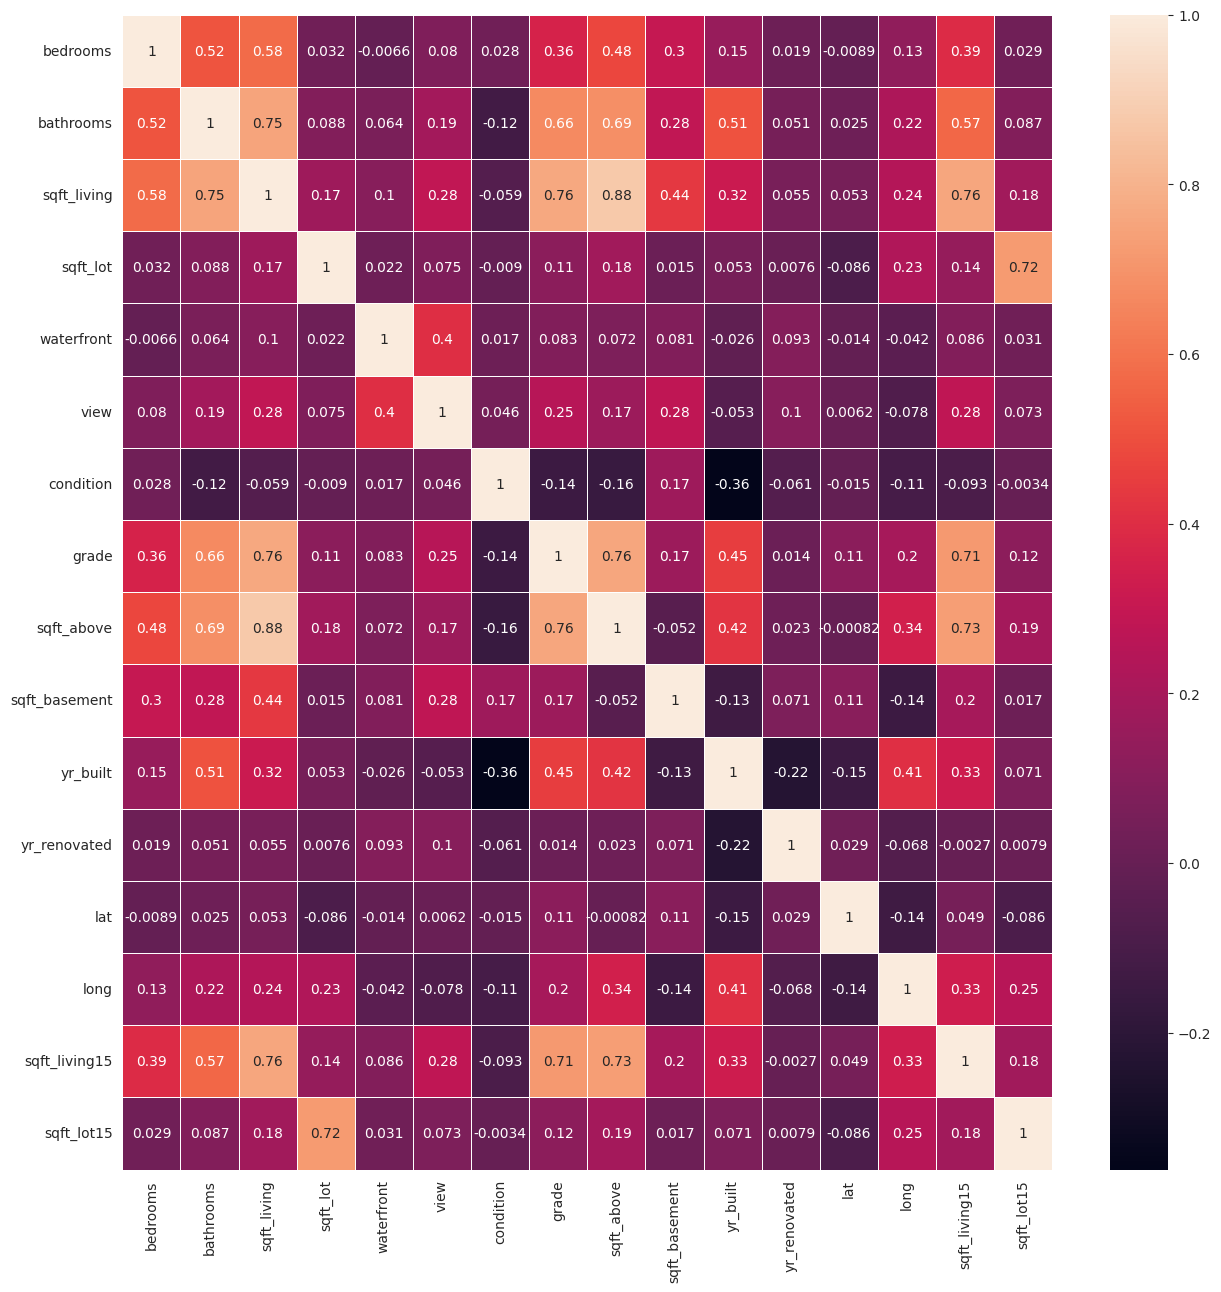

In [5]:
# korelacja Pearsona
corr_matrix = df[attributes].corr()
fig, ax = plt.subplots(figsize=(15,15)) 
sn.heatmap(corr_matrix, annot=True, linewidths=.5)

Współczynnik korelacji Pearsona dla niektórych par predyktorów wynosi $ \rho_{X,Y}> 0,5 $ co sugeruje nietrywialną zależność między nimi. Te zmienne należy porzucić jako predyktory w innym wypadku niewielka zmiana danych testowych spowoduje duże zmiany w wartościach współczynników dla skorelowanych predyktorów w modelu regresji (powodując jego niską stabilność).

Oczywiście może wystąpić zależność między predyktorami, której nie da się wykryć spoglądając na macierz korelacji bo występuje między kilkoma predyktorami. Na to już zastosować należy VIF. 

In [6]:
# średnia, mediana, kwantyle
df[attributes].describe()
# Standardowe odchylenie dla wielu z poniższych zmiennych jest bardzo duże, co sugeruje, że dane są bardzo rozproszone

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


Punkt przecięcia z osią y może być nieadekwatny lub nieprawidłowy jeśli predyktory mają wysokie średnie. Predyktory z wysokimi średnimi mogą wywierać większy wpływ na model regresji nieproporcjonalnie do faktycznego wpływu na zmienną zależną.
Duże odchylenie standardowe predyktorów może skutkować brakiem zbieżności procesu optymalizacji przy modelach Ridge i Lasso regression. 
Predyktory z szerokim zakresem zmienności mogą powodować problemy ze zbieżnością procesu optymalizacji, może to też sugerować potrzebę usunięcia potencjalnych outlierów (szeroki zakres to także potencjalnie odjechane wartości od reszty danych). 

In [7]:
# zakresy zmienności
def calculate_range_of_variation(dff):
    range_of_variation = dff.max() - dff.min()
    return range_of_variation

calculate_range_of_variation(df)

bedrooms         3.300000e+01
bathrooms        8.000000e+00
sqft_living      1.325000e+04
sqft_lot         1.650839e+06
waterfront       1.000000e+00
view             4.000000e+00
condition        4.000000e+00
grade            1.200000e+01
sqft_above       9.120000e+03
sqft_basement    4.820000e+03
yr_built         1.150000e+02
yr_renovated     2.015000e+03
lat              6.217000e-01
long             1.204000e+00
sqft_living15    5.811000e+03
sqft_lot15       8.705490e+05
dtype: float64

bedrooms          1.974300
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

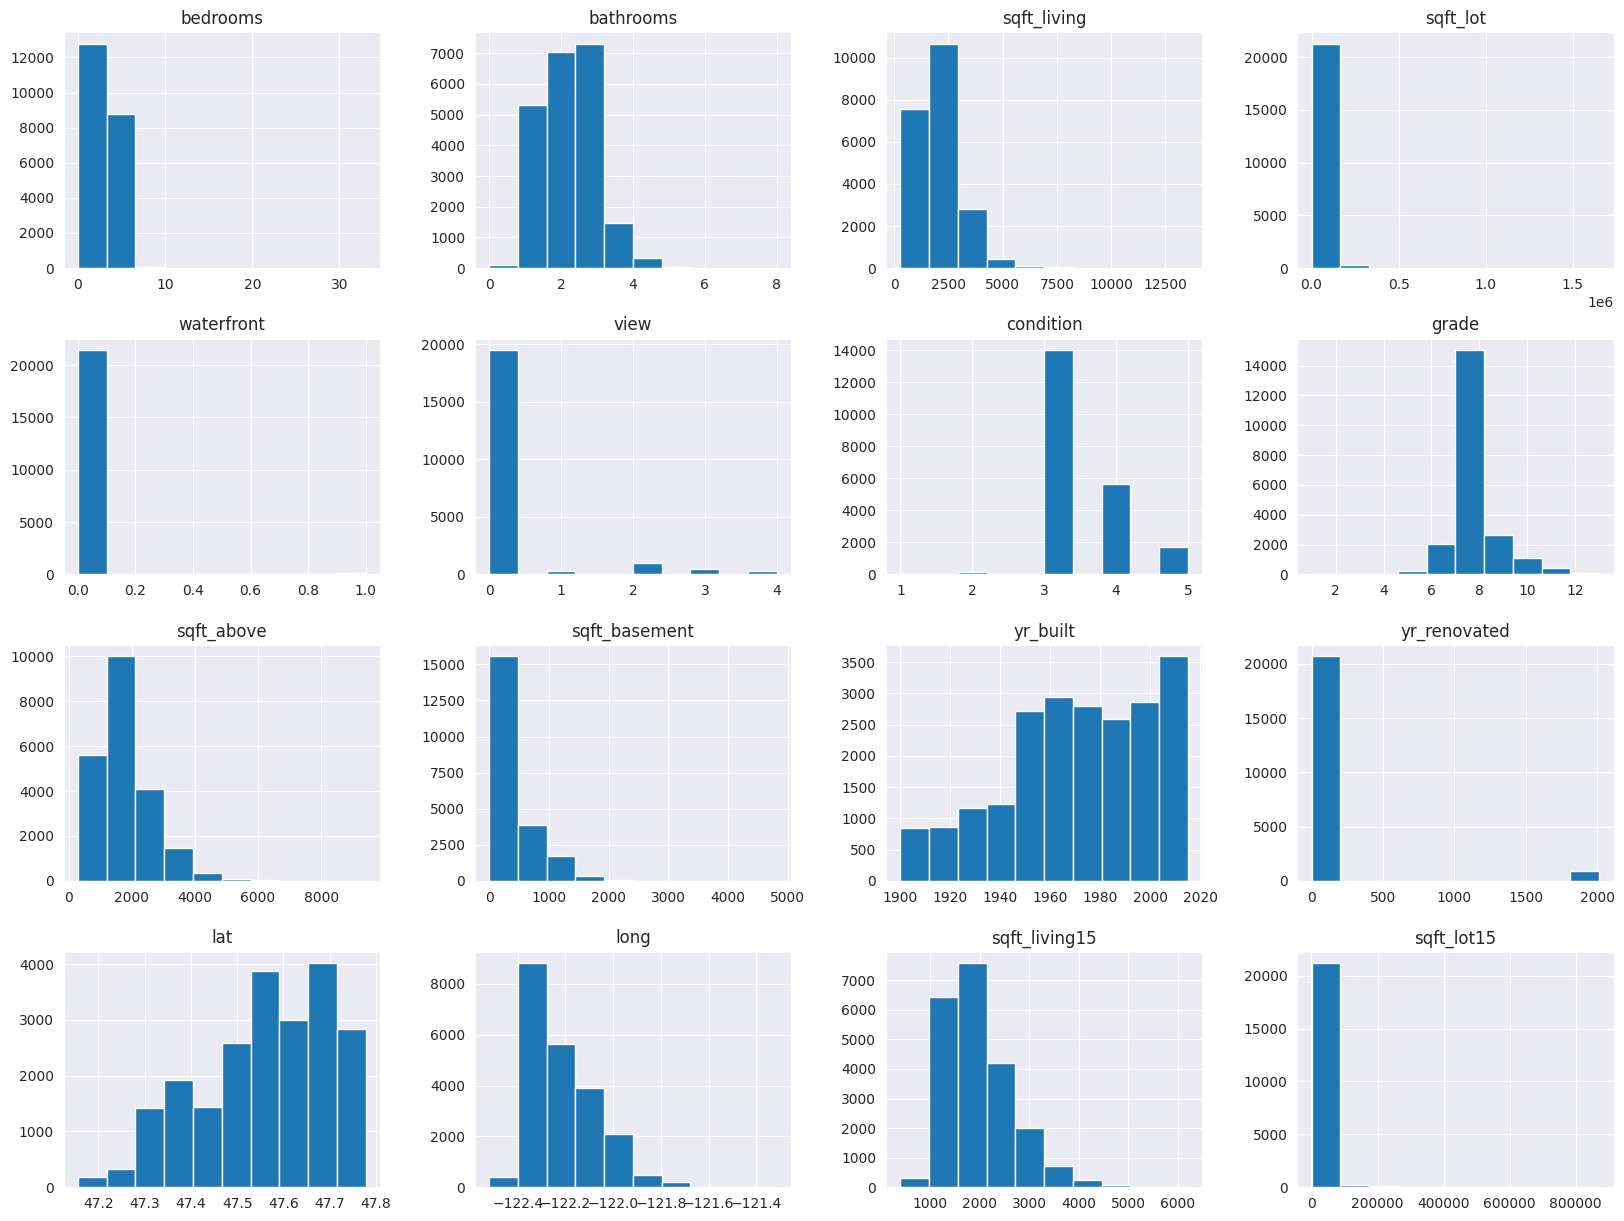

In [8]:
# skośność
display(df[attributes].skew())
# Histogramy aby zauważyć graficznie skośność
df[attributes].hist(figsize=(20,15))
plt.show()

Skośność danych może mieć katastrofalny skutek dla predykcji modelem ponieważ może prowadzić do błędów w estymacji parametrów modelu. Obserwacje ogonowe "przeciągają" w swoją stronę średnią i miedianę, co zwraca uwagę na pomiary 

## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

## Zadanie 3
Dokonaj wizualizacji nowych cech i określ ich korelację.

## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzbietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso/LARS.
5. Wykorzystujące cechy wybrane w metodzie Lasso/LARS i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.